**ANALYSIS OF THE PRICE VOLATILITY AND THE FACTORS THAT BRING ABOUT PRICE FLUCTUATIONS.**

**DATA PREPARATIONS**




**1) we start by importing the relevant libraries**

In [ ]:

# importing pandas
import pandas as pd

# importing numpy
import numpy as np

# importing datetime
import datetime as dt

**2) Loading our datasets**

In [ ]:
# Loading data on food production per capita in  kenya
dfc = pd.read_csv('/content/GDP.csv', delimiter = ',')
dfc.head(8)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.078431,18.648649,12.129841,3.961402,7.962872,5.882353,7.307692,8.203903,2.547144,1.185788,7.046874,1.991986,1.238042,7.616588,-2.971257,-3.273646,1.975547,7.911563,1.214349,1.050608,1.800226,-0.090708,-10.519749,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.013078,0.328067,0.180223,3.337903,-0.178726,2.212603,3.936671,4.189368,2.648553,0.050826,-0.095421,-2.343192,-1.089417,2.051914,4.409975,5.570030,3.425412,1.789507,2.603876,3.197143,3.526480,3.992607,2.908004,5.656582,6.361804,6.688755,6.857304,4.572539,0.946811,5.152336,4.014183,1.972652,4.308370,3.986754,2.925591,2.019391,2.542298,2.475272,2.077898,-2.939186
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.848719,3.770212,7.272501,5.396356,4.049794,-1.787094,-9.546521,1.465741,15.491934,17.909,10.807508,3.145958,4.213394,10.249852,-2.164314,8.578717,4.726198,-2.194216,5.230790,1.995341,-6.932754,-3.350479,-6.534200,0.559360,5.551687,1.414759,1.448387,4.844282,2.272113,6.562921,1.121069,2.693959,-1.160468,-0.299641,1.927028,4.629048,4.234699,3.506516,1.421036,3.734635,5.212695,9.899591,5.518510,8.013486,5.848351,5.374463,5.530987,6.279223,6.274463,6.957010,4.848351,5.142964,6.104241,5.927350,2.745937,0.127595,2.318042,2.952230,3.190336,-0.884981
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.400001,0.000000,4.200001,6.000002,3.499999,2.900002,4.082749,6.128890,0.041621,-3.450099,0.991359,-5.838281,-23.983417,1.339363,15.000000,13.544370,7.274277,4.691146,2.181490,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,0.858713,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-5.399987
5,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.745635,2.948597,1.104938,-1.251597,1.780644,5.637243,-0.787843,-1.420040,9.836549,-9.575640,-28.002142,-7.187111,9.559412,8.302867,13.322333,9.099999,-10.919984,8.829424,12.890804,6.946217,8.293313,4.536524,5.528637,5.514668,5.526424,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406,1.417243,1.002018,1.774449,2.218726,3.314981,3.802227,4.019360,2.113420,-3.955398
6,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.649465,8.149743,7.788467,5.618790,0.542206,3.303787,2.838576,1.463000,0.041557,2.208728,-0.132475,1.246461,1.770118,1.784687,2.321433,3.253322,5.547122,5.094326,4.827034,3.781388,2.546004,0.929214,-1.031484,2.383182,2.757502,4.649739,9.067672,3.194793,4.099079,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.952693
7,Arab World,ARB,GDP growth (annual %),NY.GDP

In [ ]:
# Loading data on historical CPI series
historical_cpi_series = pd.read_excel('/content/Historical CPI series 2020.xlsx')
historical_cpi_series.head()

,MONTHLY CPI FROM 1962,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Year,Month,Index
2,1962,Mar,0.475034
3,NaN,Jun,0.480142
4,NaN,Sep,0.48525


In [ ]:
# Loading data on food production per capital
kenya_food_security = pd.read_csv('/content/food-security-in-kenya-2000-2019-suite-of-food-security-indicators-faostat-per-capita-food-produ.csv')
kenya_food_security.head()

,Year,Value
0,2001,5.8
1,2002,5.5
2,2003,5.5
3,2004,5.5
4,2005,4.2


In [ ]:
# Loading data on climate
climate = pd.read_csv('/content/observed-average-annual-precipitation-of-kenya-for-1901-2020.csv')
climate.head()

,Category,Annual Mean,5-yr smooth
0,1901,642.62,666.40
1,1902,713.10,675.39
2,1903,648.55,683.47
3,1904,674.77,689.70
4,1905,727.50,693.19


In [ ]:
# Loading data on food prices
df = pd.read_csv('/content/wfp_food_prices_ken.csv')
df.head(8)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,13.0202
2,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.2959
3,1/15/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,28.5565
4,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17,0.1496
5,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,10.9968
6,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,KES,1800,15.8354
7,1/15/2006,Eastern,Kitui,Kitui,-1.366667,38.016667,pulses and nuts,Beans (dry),KG,actual,Retail,KES,39,0.3431


**DATA CLEANING**

**CLEANING DATA FOR THE HISTORICAL CPI DATA**

In [ ]:
# Cleaning the CPI data
# Checking Validity
# Renaming column names
historical_cpi_series.rename(columns={'MONTHLY CPI FROM 1962 ': 'year', 'Unnamed: 1': 'Month', 'Unnamed: 2' : 'CPI'}, inplace=True)

#Checking completeness
# Finding null values and visualizing null values per column in the data set
historical_cpi_series.isnull().describe()
# Filling missing values for year with the foward fill technique
historical_cpi_series['year'] = historical_cpi_series['year'].fillna(method='ffill')
# Checking for any reamaining null values
historical_cpi_series.isnull().describe()

# Checking Validity
# Creating a new column day with a arbitrary value 01
historical_cpi_series['Day'] ='01'
# Dropping the first two rows with irrellevant data
historical_cpi_series = historical_cpi_series.drop([historical_cpi_series.index[0], historical_cpi_series.index[1]])
# Visualizing the month column
historical_cpi_series['Month'].unique()
# Replacing the months with appropiate numerical reprsentations
historical_cpi_series = historical_cpi_series.replace(['Mar', 'Jun', 'Sep', 'Dec', 'Jan', 'Feb', 'Apr', 'May', 'Jul', 'Aug', 'Oct', 'Nov'], ['03', '06', '09', '12', '01', '02', '04', '05', '07', '08', '10', '11'])
# Converting year column from object to integer
historical_cpi_series['year'] = historical_cpi_series['year'].astype(int)
# Dropping all data of the years before 2006
historical_cpi_series = historical_cpi_series[historical_cpi_series['year'] >= 2006]
# Converting year column from integer to string
historical_cpi_series['year'] = historical_cpi_series['year'].astype(str)
# converting CPI column from integer to str
historical_cpi_series['CPI'] = historical_cpi_series['CPI'].astype(str)
# Joining the year month and day columns to form a new column date
historical_cpi_series['Date'] = historical_cpi_series[['year', 'Month', 'Day']].agg('-'.join, axis = 1)
# Converting the column date from object to date time
historical_cpi_series['Date'] = pd.to_datetime(historical_cpi_series['Date'])
# Drop the date and month column
historical_cpi_series = historical_cpi_series.drop(['Month', 'Day'], axis = 1)
# Convert CPI Column to integer
historical_cpi_series['CPI'] = historical_cpi_series['CPI'].astype(float)
# visualizing the cleaned data and getting data types
historical_cpi_series.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 354 to 530
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    177 non-null    object        
 1   CPI     177 non-null    float64       
 2   Date    177 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.5+ KB


Checking completeness;
- The historical CPI Series was queried for null values
- The null values were studied observed only on the year column.
- The empty spaces in year column was due to data input format that inserted the one year and the months for that year the data was collected leaving many spaces.
- The null values were filled using the foward fill technique
- No further null values were observed after this step

Checking data validity;
- The column names containing data on year, month and CPI   were renamed appropiately to year, month and CPI
- A new column day was added with an arbitrary value 01, for later joining to form new column date
- All the columns that weren't in string format were converted to strings
- The year, month and day column were merged to form form a new column date
- The date column was then converted to date time format
- The year column was then converted to integer and all dates lower than 2006 were dropped 
- The CPI data was then reconverted to float value


In [ ]:
# checking for duplicates using the duplicated method
historical_cpi_series.duplicated().any()

False

There were no duplicate datasets in the dataframe containing CPI information

In [ ]:
# getting Average CPI per year(Group by year the CPI and find mean)
average_cpi_per_year = historical_cpi_series['CPI'].groupby(historical_cpi_series['year']).mean().reset_index()
# Creating a dataframe from the grouped CPI's
average_cpi_per_year = pd.DataFrame(average_cpi_per_year)
# Visualizing the newly grouped table
average_cpi_per_year
#Renaming the column name from CPI to average_cpi_per_year
average_cpi_per_year.rename(columns={'CPI': 'av CPI per year'}).head(1)
average_cpi_per_year.head()

,year,CPI
0,2006,39.305230
1,2007,40.983774
2,2008,47.178007
3,2009,52.149336
4,2010,54.279033


## Kenyan commodity prices data cleaning

In [ ]:
# we now have to check the columnns of the dataset with missing values

df.isnull().any()
# To understand how many distinct dates are involved in this dataset

df['date'].unique()
# we can preview the dataset in terms of its properties to see whether we can change some properties or not

df.describe()
# As per our data understanding ,we found three data columns to be not relevant to the research problem.
# we will drop them since we will not need them in our analysis
# Columns like latitude, longitude and priceflag were dropped because they are not ralevant to our research problem.
df.drop(["latitude", "longitude" , "priceflag"  ], axis = 1, inplace = True) 
# dropping the first row

df = df.drop([0], axis=0)
# We have to check the accuracy of the dataset in terms of the right datatype for each column
df['date'] = pd.to_datetime(df['date'])
formatted_df = df['date'].dt.strftime("%m/%d/%y")
# Change the datatype to the right datatype
df["price"] = df["price"].astype(float)
df["usdprice"] = df["usdprice"].astype(float)
df.rename({'admin1':'Regions', 'admin2':'Sub_region'}, axis='columns', inplace = True)
df.duplicated().any
# Splitting the date column to day month year
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df.head()
# Grouped datasets
df.columns
df['grouped'] =1       #initially, set that counter to 1.
group_data = df.groupby(['Regions', 'Sub_region', 'market', 'category', 'commodity',
       'unit', 'year', 'pricetype', 'currency'])['price'].mean().reset_index()#sum function
group_data 
commodity_prices = pd.DataFrame(group_data)
commodity_prices.sort_values(by='year', ascending=True).head()
#commodity_prices.info()
# Convert year to float
commodity_prices['year'] = commodity_prices['year'].astype(str)
commodity_prices.head(20)

,Regions,Sub_region,market,category,commodity,unit,year,pricetype,currency,price
0,Central,Nyeri,Karatina (Nyeri),cereals and tubers,"Maize (white, dry)",90 KG,2021,Wholesale,KES,3001.500000
1,Central,Nyeri,Karatina (Nyeri),cereals and tubers,Millet (finger),90 KG,2021,Wholesale,KES,8100.000000
2,Central,Nyeri,Karatina (Nyeri),cereals and tubers,"Potatoes (Irish, red)",50 KG,2021,Wholesale,KES,1177.110000
3,Central,Nyeri,Karatina (Nyeri),cereals and tubers,Sorghum (red),90 KG,2021,Wholesale,KES,5400.000000
4,Central,Nyeri,Karatina (Nyeri),pulses and nuts,Beans (kidney),90 KG,2021,Wholesale,KES,6201.000000
5,Central,Nyeri,Karatina (Nyeri),pulses and nuts,Beans (mung),90 KG,2021,Wholesale,KES,11997.000000
6,Central,Nyeri,Karatina (Nyeri),pulses and nuts,Beans (yellow),90 KG,2021,Wholesale,KES,8001.000000
7,Central,Nyeri,Karatina (Nyeri),vegetables and fruits,Cabbage,126 KG,2021,Wholesale,KES,1197.133333
8,Central,Nyeri,Karatina (Nyeri),vegetables and fruits,Kale,50 KG,2021,Wholesale,KES,639.110000
9,Central,Nyeri,Karatina (Nyeri),vegetables and fruits,Onions (dry),13 KG,2021,Wholesale,KES,660.776667


## Rainfall data Datacleaning

In [ ]:
# Creating dataframe with desired years
climate_kenya = climate[climate['Category'] > 2005].reset_index()
climate_kenya.head()
# To confirm DataFrame dimensions
climate_kenya.shape

# Checking for missing values
climate_kenya.isnull().any()
climate_kenya.head(10)

,index,Category,Annual Mean,5-yr smooth
0,105,2006,769.28,644.61
1,106,2007,692.64,649.83
2,107,2008,661.27,657.11
3,108,2009,655.41,665.90
4,109,2010,650.73,675.62
5,110,2011,626.92,686.34
6,111,2012,783.07,699.07
7,112,2013,740.69,714.89
8,113,2014,608.32,734.88
9,114,2015,778.31,760.14


In [ ]:
#Removing white spaces on column name and changing to lower case
climate_kenya.columns = climate_kenya.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
climate_kenya.head()

# Creating a function to drop unnecessary columns
def dropping_columns(data,cols):
  data.drop(cols, axis = 1, inplace = True)

  return data

columns = ['index', '5-yr_smooth']
climate_kenya = dropping_columns(climate_kenya, columns)

# checking for duplicates
climate_kenya.duplicated().any()

# Renaming the column category to year
climate_kenya.rename({'category':'year', 'annual_mean':'annual_rainfall'}, axis = 1, inplace = True)
climate_kenya.head()
# Convert year to float
climate_kenya['year'] = climate_kenya['year'].astype(str)
climate_kenya.head(10)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,year,annual_rainfall
0,2006,769.28
1,2007,692.64
2,2008,661.27
3,2009,655.41
4,2010,650.73
5,2011,626.92
6,2012,783.07
7,2013,740.69
8,2014,608.32
9,2015,778.31


## Consumer production per capita

In [ ]:
# CLEANING

# 1. Validity
# procedure: removing irrelevant observations
# data cleaning action: removing 2001 - 2005 rows
# explanation: they're not relevant to our study


food = kenya_food_security.drop([0, 1, 2, 3, 4])
food
# resetting index
# food_security = food.reset_index()

# dropping index
food.reset_index(drop=True, inplace=True)




# 2. Completeness
# procedure: check for missing values 
# data cleaning action: check for missing values as a whole
# explanation: missing values result to incomplete analysis

food.isnull()

# 4. Consistency 
# *** no duplicates observed ***

# 3. Uniformity
# changing 'Year' to lower

food.rename(columns = {'Year':'year'}, inplace = True)

# procedure: Starndadization - data types
# data cleaning action: changing yeat to datetime 
# explanation: all the other datasets have year as datetime because we'll merge

# checking data types 
food.dtypes

# changing year to datetime
# food_security['Year'] = food_security['Year'].astype('datetime64[ns]')
# df['Date'] = df['Date'].astype('datetime64[ns]')

# checking data types again
food.dtypes
# Convert year to float
food['year'] = food['year'].astype(str)

food.head(10)

,year,Value
0,2006,7.0
1,2007,9.0
2,2008,8.7
3,2009,7.2
4,2010,2.5
5,2011,2.9
6,2012,4.9
7,2013,5.4
8,2014,5.6
9,2015,5.8


## GDP growth data cleaning

In [ ]:

#To get the data from the country name Kenya

df_kenya = dfc[dfc['Country Name'] == "Kenya"]
df_kenya

# # To preview which columns are null

df_kenya.isnull()

# # lets understand the datatype

#df_kenya.info()

# # lets get the properties of the data

df_kenya.describe()

# # We drop column that wont be used to analyse the business objectives


#df_kenya.drop(df_kenya.loc[:,'1960':'2005'].columns, axis = 1, inplace = True)

#df_kenya.head()

# # we now transpose the dataset we want

df_kenya = df_kenya.transpose()
df_kenya
# # converting to CSV file
# df_kenya.to_csv("Annual_GDP_growth.csv")

# # reseting the index

df_kenya = df_kenya.reset_index()
df_kenya

# # we need to drop the first colums and rename the column names

df_kenya = df_kenya.drop([0,1,3], axis=0)
df_kenya

# # resets the index

df_kenya = df_kenya.reset_index()
df_kenya

# # Drop the level_o column(last index created)

df_kenya.drop(["level_0"], axis = 1, inplace = True) 

df_kenya.head()

# # Renaming the column names

df_kenya.rename({'index':'year', 121:'GDP_growth_annual%'}, axis='columns', inplace = True)
df_kenya


# # we need to drop the first colums and rename the column names

df_kenya = df_kenya.drop([0], axis=0 )
df_kenya

# # reseting the index

df_kenya = df_kenya.reset_index()
df_kenya

# # Drop the new index again
df_kenya.drop(["index"], axis = 1, inplace = True) 

df_kenya

# # Lets preview the data we have


# Convert year to float
df_kenya['GDP_growth_annual%'] = df_kenya['GDP_growth_annual%'].astype(float)
df_kenya['GDP_growth_annual%'] = df_kenya['GDP_growth_annual%'] / 100
# Convert year to float
df_kenya['year'] = df_kenya['year'].astype(int)
df_kenya.info()
# Drop values below 2006
df_kenya = df_kenya[df_kenya['year'] > 2005]
df_kenya.head()
df_kenya.reset_index(drop=True, inplace=True)
df_kenya.head()
df_kenya['year'] = df_kenya['year'].astype(str)
df_kenya.info()
df_kenya.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                61 non-null     int64  
 1   GDP_growth_annual%  60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                15 non-null     object 
 1   GDP_growth_annual%  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


,year,GDP_growth_annual%
0,2006,0.064725
1,2007,0.068507
2,2008,0.002323
3,2009,0.033069
4,2010,0.080585
5,2011,0.051211
6,2012,0.045687
7,2013,0.037978
8,2014,0.050201
9,2015,0.049677


## Merge frames

In [ ]:
# We endeavour to merge all of the cleaned datasets into one unified data pool

average_cpi_per_year.columns
df10 = average_cpi_per_year.merge(df_kenya, how = 'left', on = 'year')
df10

df11 = df10.merge(climate_kenya, how = 'left', on = 'year')
df11
df12 = df11.merge(food, how = 'left', on = 'year')
df12
df13 = df12.merge(commodity_prices, how = 'left', on = 'year')
df13.info()
df13.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                605 non-null    object 
 1   CPI                 605 non-null    float64
 2   GDP_growth_annual%  605 non-null    float64
 3   annual_rainfall     605 non-null    float64
 4   Value               355 non-null    float64
 5   Regions             605 non-null    object 
 6   Sub_region          605 non-null    object 
 7   market              605 non-null    object 
 8   category            605 non-null    object 
 9   commodity           605 non-null    object 
 10  unit                605 non-null    object 
 11  pricetype           605 non-null    object 
 12  currency            605 non-null    object 
 13  price               605 non-null    float64
dtypes: float64(5), object(9)
memory usage: 70.9+ KB


,year,CPI,GDP_growth_annual%,annual_rainfall,Value,Regions,Sub_region,market,category,commodity,unit,pricetype,currency,price
0,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize,KG,Wholesale,KES,19.920000
1,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize (white),90 KG,Wholesale,KES,1411.132500
2,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans,KG,Wholesale,KES,34.437500
3,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3202.829167
4,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Maize (white),KG,Retail,KES,19.666667
5,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,1520.825000
6,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Sorghum,90 KG,Wholesale,KES,1950.000000
7,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,pulses and nuts,Beans (dry),KG,Retail,KES,46.000000
8,2006,39.30523,0.064725,769.28,7.0,Eastern,Marsabit,Marsabit,cereals and tubers,Maize (white),KG,Retail,KES,21.250000
9,2006,39.30523,0.064725,769.28,7.0,Nairobi,Nairobi,Nairobi,cereals and tubers,Bread,400 G,Retail,KES,26.166667


## Exporting data

In [ ]:
# Exporting data one
from google.colab import files
df13.to_csv('project_analysis.csv')
files.download('project_analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Exporting data 2
df13.to_csv("Project_Analysis.csv")
df13


,year,CPI,GDP_growth_annual%,annual_rainfall,Value,Regions,Sub_region,market,category,commodity,unit,pricetype,currency,price
0,2006,39.305230,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize,KG,Wholesale,KES,19.920000
1,2006,39.305230,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize (white),90 KG,Wholesale,KES,1411.132500
2,2006,39.305230,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans,KG,Wholesale,KES,34.437500
3,2006,39.305230,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3202.829167
4,2006,39.305230,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Maize (white),KG,Retail,KES,19.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2020,108.002254,-0.003162,791.50,NaN,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),cereals and tubers,Maize,KG,Wholesale,KES,31.222500
601,2020,108.002254,-0.003162,791.50,NaN,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),cereals and tubers,Maize (white),90 KG,Wholesale,KES,3000.000000
602,2020,108.002254,-0.003162,791.50,NaN,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),cereals and tubers,Potatoes (Irish),50 KG,Wholesale,KES,1821.943333
603,2020,108.002254,-0.003162,791.50,NaN,Rift Valley,Uasin Gishu,Eldoret town (Uasin Gishu),cereals and tubers,Sorghum,90 KG,Wholesale,KES,5400.000000


In [ ]:
df13.head()

,year,CPI,GDP_growth_annual%,annual_rainfall,Value,Regions,Sub_region,market,category,commodity,unit,pricetype,currency,price
0,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize,KG,Wholesale,KES,19.920000
1,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,cereals and tubers,Maize (white),90 KG,Wholesale,KES,1411.132500
2,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans,KG,Wholesale,KES,34.437500
3,2006,39.30523,0.064725,769.28,7.0,Coast,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,Wholesale,KES,3202.829167
4,2006,39.30523,0.064725,769.28,7.0,Eastern,Kitui,Kitui,cereals and tubers,Maize (white),KG,Retail,KES,19.666667


**ANALYSIS OF THE CORRELATION BETWEEN THE CORRELATION OF INFLATION AND FOOD PRICE VOLATILITY.**

In [ ]:
# First we want to extract the relevant data we will use for the analysis of CPI on the relevant commodity price flactuation

five_minutes_lol = df13.groupby(['year', 'CPI'])['price'].mean()
five_minutes_lol.head(30)


year  CPI       
2006  39.305230      931.432214
2007  40.983774      907.794489
2008  47.178007     1194.608551
2009  52.149336     1414.021186
2010  54.279033     1230.282461
2011  61.890025     1712.863251
2012  67.694234     1887.390389
2013  71.564647     1804.083116
2014  76.486974     1735.806469
2015  81.521379     1570.376999
2016  86.671591     1678.295260
2017  93.592377     2017.537716
2018  97.981626     1694.476547
2019  103.115563    1878.542067
2020  108.002254    1386.553271
Name: price, dtype: float64

In [ ]:
# We reset the index so that we can hace a structured dataset for plotting and what nots

five_minutes_lol = df13.groupby(['year', 'CPI', 'commodity'])['price'].mean()
df14 = five_minutes_lol.reset_index()
df14.head(30)

,year,CPI,commodity,price
0,2006,39.305230,Beans,38.663958
1,2006,39.305230,Beans (dry),2599.399167
2,2006,39.305230,Bread,26.166667
3,2006,39.305230,Maize,16.315833
4,2006,39.305230,Maize (white),709.330938
5,2006,39.305230,"Milk (cow, pasteurized)",22.500000
6,2006,39.305230,Oil (vegetable),120.250000
7,2006,39.305230,Potatoes (Irish),1035.276799
8,2006,39.305230,Sorghum,1651.061124
9,2007,40.983774,Beans,39.169375


In [ ]:
df15 = df14[df14['commodity'] == 'Maize (white)']
df15

,year,CPI,commodity,price
4,2006,39.305230,Maize (white),709.330938
13,2007,40.983774,Maize (white),614.079479
22,2008,47.178007,Maize (white),971.562500
31,2009,52.149336,Maize (white),1276.960938
40,2010,54.279033,Maize (white),903.919688
49,2011,61.890025,Maize (white),1535.198924
58,2012,67.694234,Maize (white),1611.160994
67,2013,71.564647,Maize (white),1510.952992
79,2014,76.486974,Maize (white),1524.541316
91,2015,81.521379,Maize (white),992.462955


No handles with labels found to put in legend.


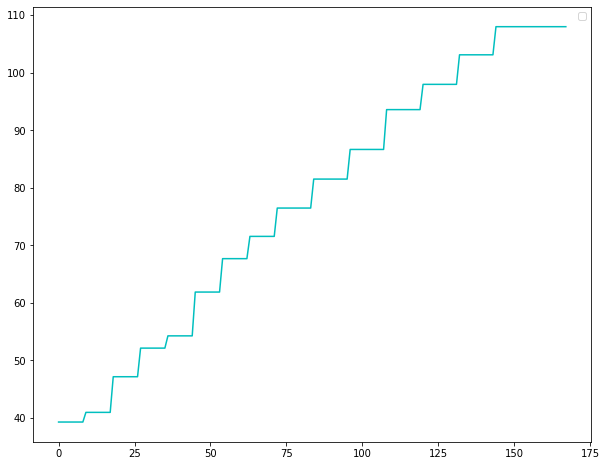

In [ ]:

import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,8)
plt.plot(df14.CPI	, 'c-')
# plt.plot(df14.price	, 'r-')
# plt.grid(True, color = 'k', linestyle = ':')
plt.legend();


No handles with labels found to put in legend.


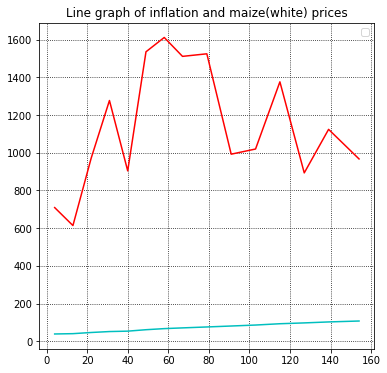

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib import rcParams
rcParams['figure.figsize'] = (6,6)
plt.plot(df15.CPI	, 'c-')
plt.plot(df15.price	, 'r-')
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Line graph of inflation and maize(white) prices')
xlabel= df15.year
plt.legend();